# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

#Imports & loads

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
from torchvision import transforms, models
import requests
from IPython.display import clear_output
%matplotlib inline

In [2]:
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
backbone = models.vgg19(pretrained=True).features.to(device).eval().requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


In [4]:
backbone

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

Replace maxpools with avgpool, so our fillter will be better transfer style

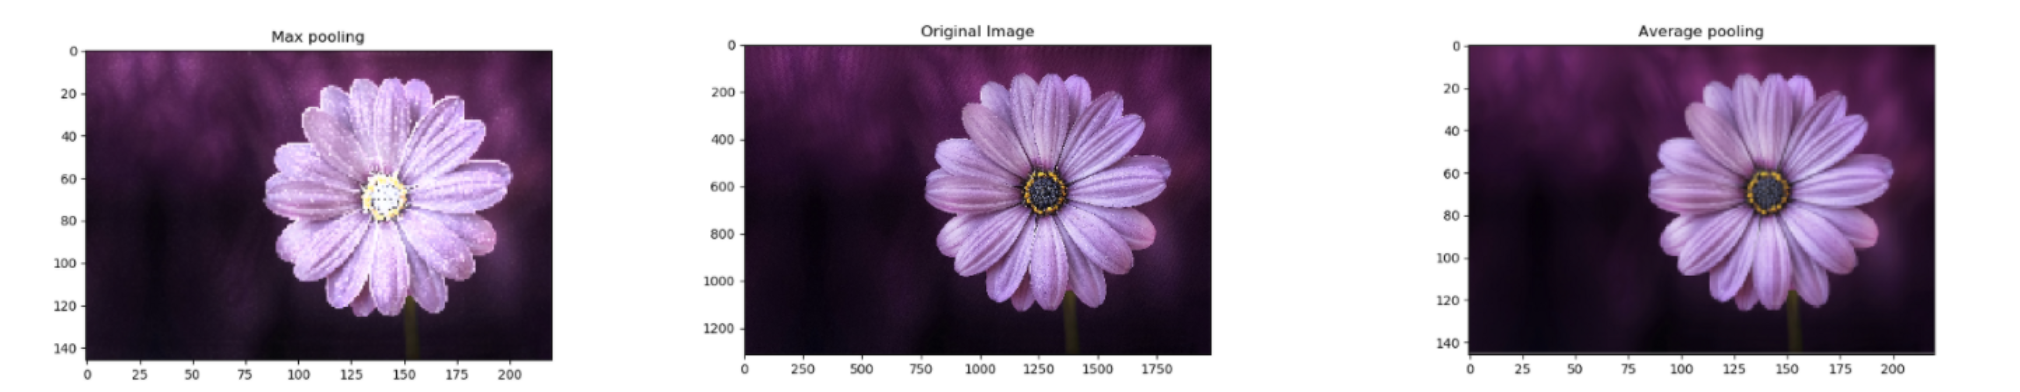

In [5]:
for (i, layer) in enumerate(backbone):
  if isinstance(layer, torch.nn.MaxPool2d):
    backbone[i] = torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

#Image load

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
def load_image(url_img, max_size=256, shape=None):
    
    image = requests.get(url_img).content
    with open('/content/image_name.jpg', 'wb') as handler:
        handler.write(image)
    image = Image.open('/content/image_name.jpg').convert('RGB')
    
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [9]:
# content im.
content = load_image('https://w-dog.ru/wallpapers/2/2/549185023775360/yug-germanii-yugo-zapadnaya-bavariya-zamok-nojshvanshtajn-osen-gory.jpg').to(device)
# styles im., resize style to content
style_1 = load_image('https://img2.goodfon.ru/original/1920x1408/0/aa/kartina-zvezdnaya-noch-van-goga.jpg',
                     shape=content.shape[-2:]).to(device)
#'https://telegra.ph/file/cb442889243e5e96cb73f.jpg'
style_2 = load_image('https://i.pinimg.com/originals/b9/90/a2/b990a2d645291b40577a7315683b61df.png',
                     shape=content.shape[-2:]).to(device)
# load mask, do not normalize and resize mask, sicne we will resize and binarize it later anyway
mask_img = Image.open('/content/drive/MyDrive/Colab Notebooks/DLS_semester1/8. NST/mask_3.png').convert('RGB')

In [14]:
# convert tesnor to image, denormalize
def im_convert(tensor):
  # tensor.detach() creates a tensor that shares storage with tensor that does not require grad. 
  # It detaches the output from the computational graph. So no gradient will be backpropagated along this variable.
  image = tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1, 2, 0) # to -> H, W, C
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
  image = image.clip(0, 1)
  return image

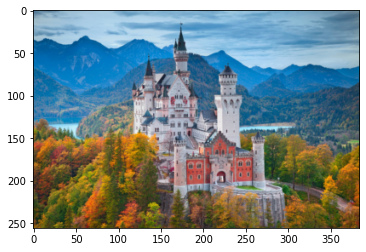

In [15]:
plt.imshow(im_convert(content))

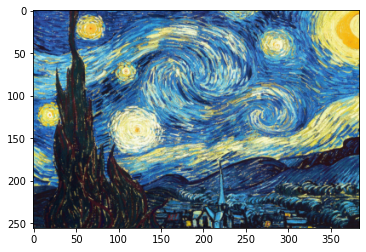

In [16]:
plt.imshow(im_convert(style_1))

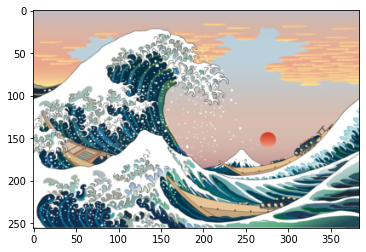

In [17]:
plt.imshow(im_convert(style_2))

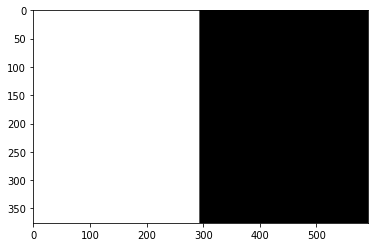

In [18]:
plt.imshow(np.asarray(mask_img))

#Net building and Training

In [19]:
def gram_matrix(tensor):
    batch_size, channels, height, width = tensor.size()
    
    tensor = tensor.view(batch_size * channels, height * width)
    gram = tensor @ tensor.t()
    
    return gram

In [20]:
def get_features(image, model, layers=None):
    if layers is None:
        layers = {'0': 'conv1_1',
                  '5': 'conv2_1', 
                  '10': 'conv3_1', 
                  '19': 'conv4_1',
                  '21': 'conv4_2',  # content layer
                  '28': 'conv5_1'}
    features = {}
    x = image
    
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
            
    return features

In [21]:
content_features = get_features(content, backbone)
style_1_features = get_features(style_1, backbone)
style_2_features = get_features(style_2, backbone)

In [22]:
style_1_grams = {layer: gram_matrix(style_1_features[layer]) for layer in style_1_features}
style_2_grams = {layer: gram_matrix(style_2_features[layer]) for layer in style_2_features}

In [41]:
target = content.clone().requires_grad_(True).to(device)

In [42]:
style_1_weights = {'conv1_1': 0.1,
                  'conv2_1': 0.2,
                  'conv3_1': 0.2,
                  'conv4_1': 0.5,
                  'conv5_1': 0.75}

style_2_weights = {'conv1_1': 0.1,
                  'conv2_1': 0.2,
                  'conv3_1': 0.2,
                  'conv4_1': 0.5,
                  'conv5_1': 0.75}

content_weight = 1 
style_1_weight = 1e5
style_2_weight = 1e5

#Train loop for two styles on different parts

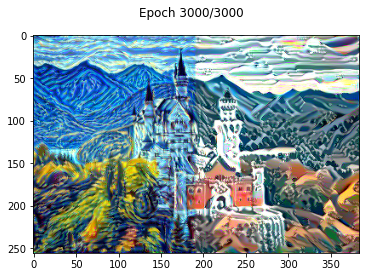

In [43]:
show_every = 50
optimizer = optim.AdamW([target], lr=3e-3)
num_epochs = 3000
mask_transform = lambda size: transforms.Compose([transforms.Resize(size),
                                                  transforms.ToTensor(),])
resized_masks = None

for ii in range(1, num_epochs+1):
    
    target_features = get_features(target, backbone)
    
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    style_1_loss = 0
    style_2_loss = 0
    
    if resized_masks is None:
        resized_masks = {key: mask_transform(target_features[key].shape[2:4]) \
                         (mask_img)[0].unsqueeze(0).unsqueeze(1).to(device) > 0 for key in target_features}
    
    for layer in style_1_weights:
        # get the "target" style representation for the layer
        target_feature = target_features[layer]
        mask = resized_masks[layer]
        
        target_1_gram = gram_matrix(target_feature*mask)
        target_2_gram = gram_matrix(target_feature*(~mask))
        
        _, d, h, w = target_feature.shape
        # get the "style" style representation
        style_1_gram = style_1_grams[layer]
        style_2_gram = style_2_grams[layer]
        # the style loss for one layer, weighted appropriately
        layer_style_1_loss = style_1_weights[layer] * torch.mean((target_1_gram - style_1_gram)**2)
        layer_style_2_loss = style_2_weights[layer] * torch.mean((target_2_gram - style_2_gram)**2)
        # add to the style loss
        style_1_loss += layer_style_1_loss / (d * h * w)
        style_2_loss += layer_style_2_loss / (d * h * w)

    total_loss = content_weight * content_loss + style_1_weight * style_1_loss + style_2_weight * style_2_loss
    
    # update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    # display intermediate images and print the loss
    if  ii % show_every == 0:
        clear_output()
        plt.imshow(im_convert(target))
        plt.suptitle('Epoch %d/%d'%(ii, num_epochs))
        plt.show()

#Train loop for two styles one image

In [44]:
# drop all previost results
target = content.clone().requires_grad_(True).to(device)

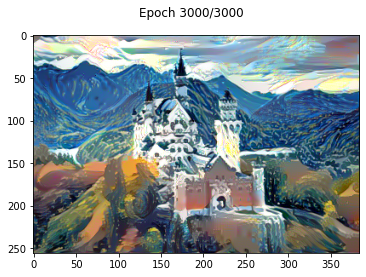

In [46]:
show_every = 50
optimizer = optim.AdamW([target], lr=3e-3)
num_epochs = 3000 

for ii in range(1, num_epochs+1):
    
    target_features = get_features(target, backbone)
    
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    style_1_loss = 0
    style_2_loss = 0
        
    mask_transform = lambda size: transforms.Compose([transforms.Resize(size), transforms.ToTensor(),])
    resized_masks = {key:mask_transform(target_features[key].shape[2:4])(mask_img)[0].unsqueeze(0).unsqueeze(1).to(device)>0 for key in target_features}
    
    for layer in style_1_weights:
        # get the "target" style representation for the layer
        target_feature = target_features[layer]
        
        target_gram = gram_matrix(target_feature)
        
        _, d, h, w = target_feature.shape
        # get the "style" style representation
        style_1_gram = style_1_grams[layer]
        style_2_gram = style_2_grams[layer]
        # the style loss for one layer, weighted appropriately
        layer_style_1_loss = style_1_weights[layer] * torch.mean((target_gram - style_1_gram)**2)
        layer_style_2_loss = style_2_weights[layer] * torch.mean((target_gram - style_2_gram)**2)
        # add to the style loss
        style_1_loss += layer_style_1_loss / (d * h * w)
        style_2_loss += layer_style_2_loss / (d * h * w)

    total_loss = content_weight * content_loss + style_1_weight * style_1_loss + style_2_weight * style_2_loss
    
    # update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    # display intermediate images and print the loss
    if  ii % show_every == 0:
        clear_output()
        plt.imshow(im_convert(target))
        plt.suptitle('Epoch %d/%d'%(ii, num_epochs))
        plt.show()